In [1]:

import os
import cv2
import natsort
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# import matplotlib
# matplotlib.use('TkAgg')

# Load the model
yolo_m = YOLO("runs/detect/train2/weights/best.pt")

def load_files(ad):
    valid_extensions = {"tiff", "tif", "png", "jpg", "jpeg", "bmp", "gif", "webp"}
    FileNames = [file for file in sorted(os.listdir(ad)) if file.split(".")[-1].lower() in valid_extensions]
    return natsort.natsorted(FileNames)


base_rrot = "test/t3/"

In [2]:
file_list = load_files(base_rrot)
_file_list = []
for ii in range(1,len(file_list),40):
    _file_list.append(file_list[ii])

file_list = _file_list

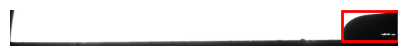

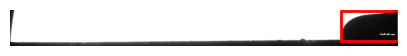

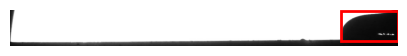

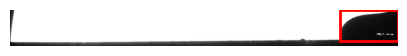

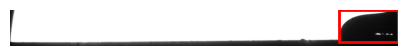

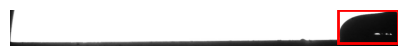

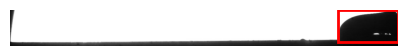

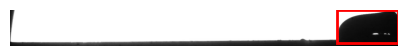

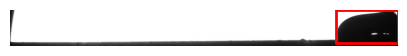

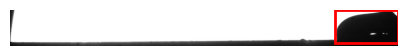

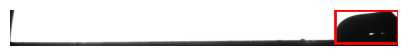

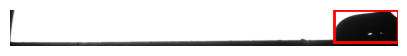

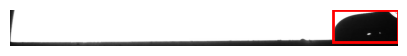

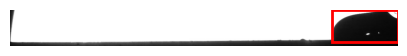

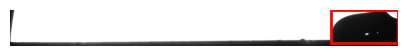

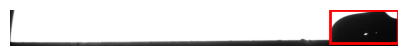

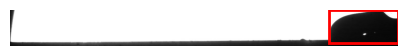

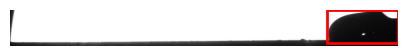

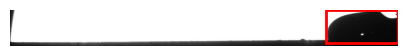

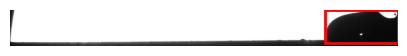

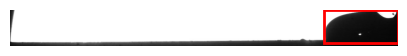

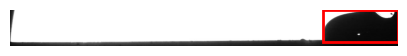

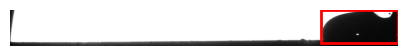

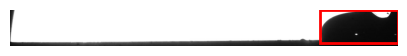

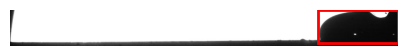

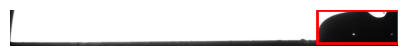

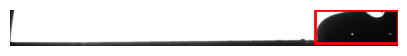

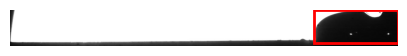

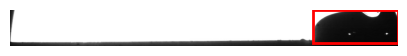

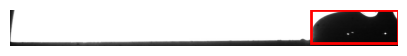

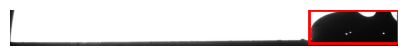

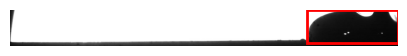

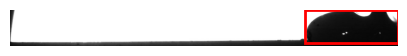

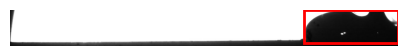

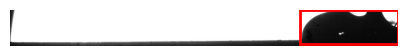

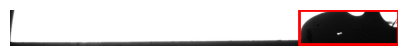

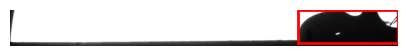

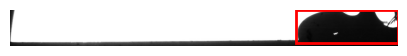

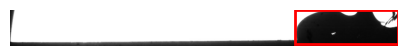

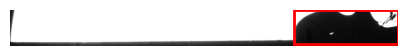

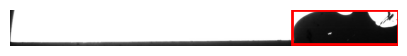

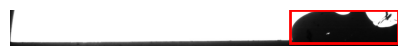

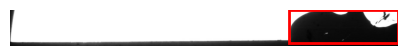

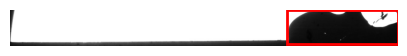

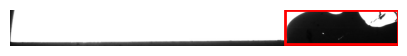

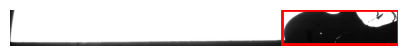

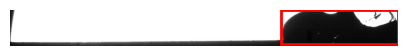

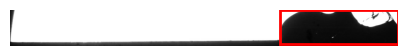

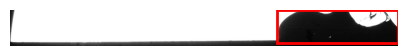

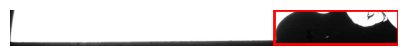

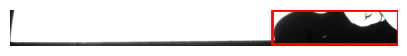

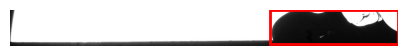

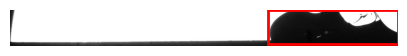

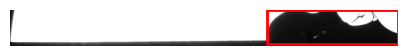

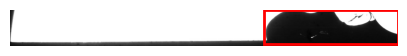

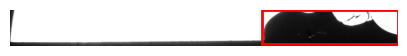

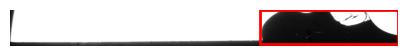

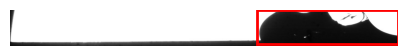

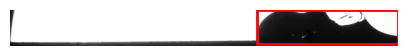

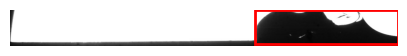

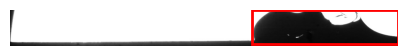

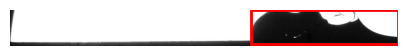

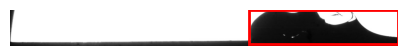

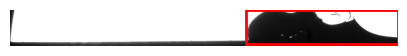

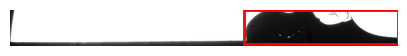

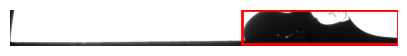

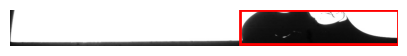

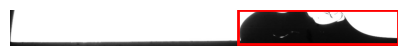

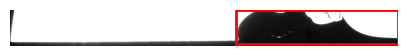

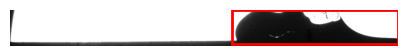

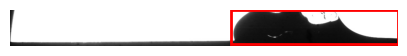

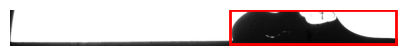

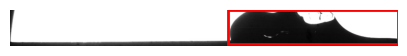

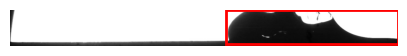

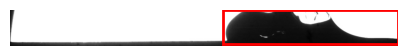

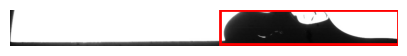

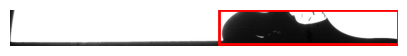

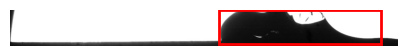

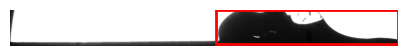

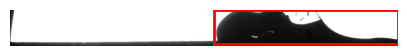

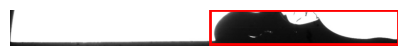

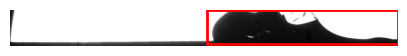

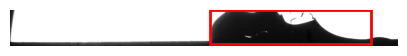

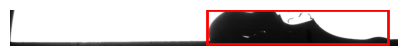

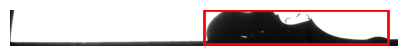

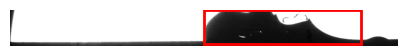

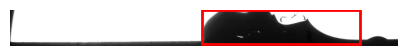

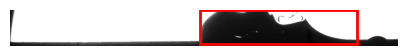

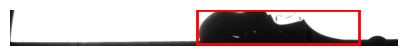

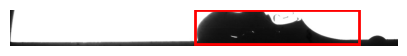

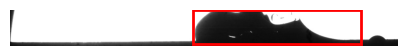

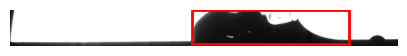

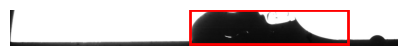

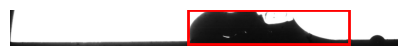

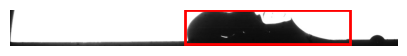

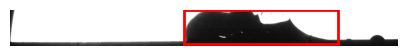

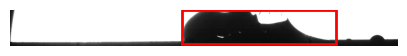

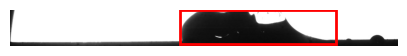

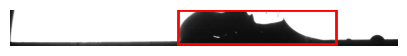

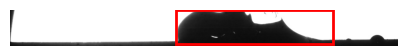

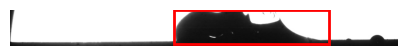

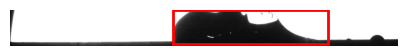

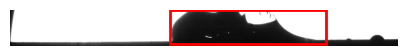

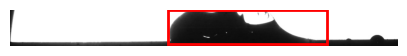

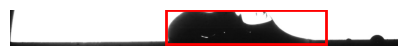

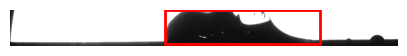

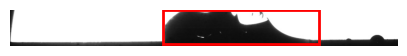

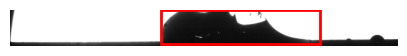

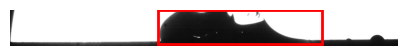

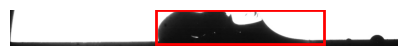

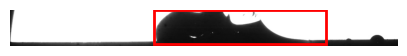

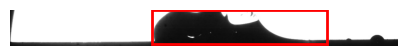

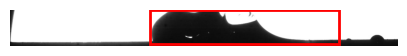

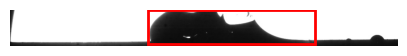

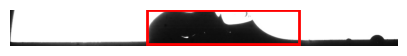

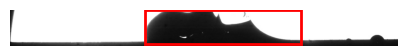

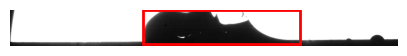

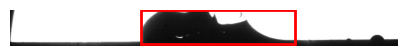

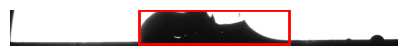

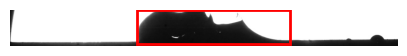

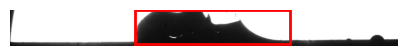

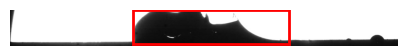

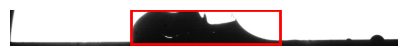

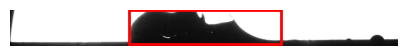

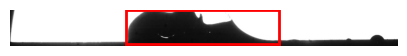

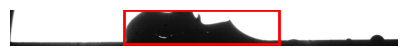

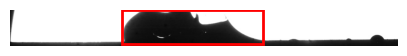

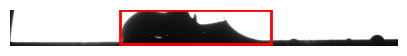

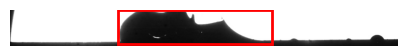

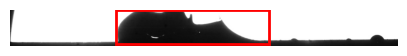

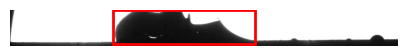

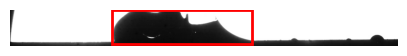

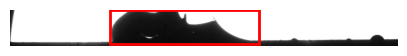

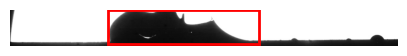

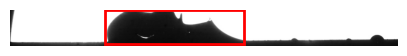

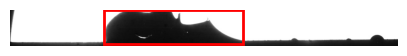

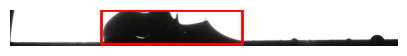

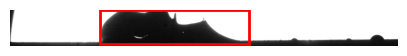

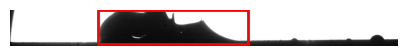

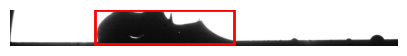

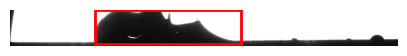

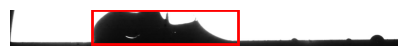

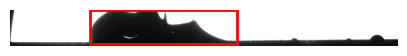

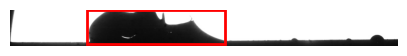

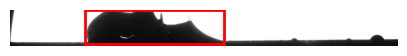

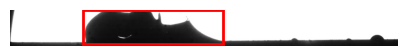

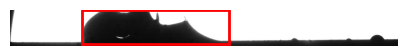

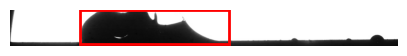

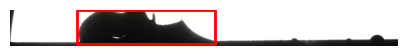

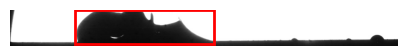

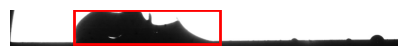

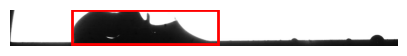

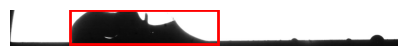

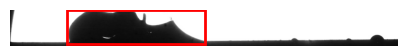

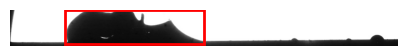

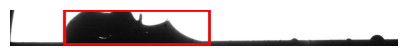

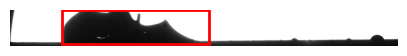

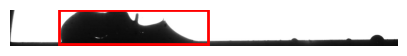

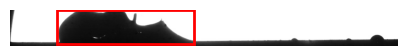

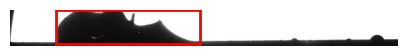

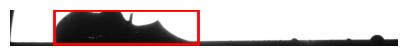

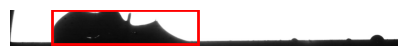

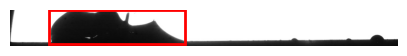

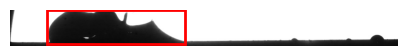

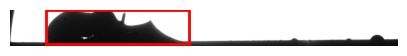

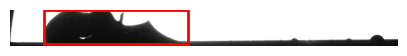

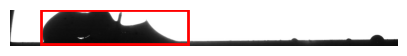

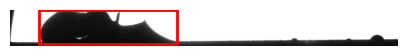

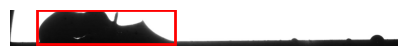

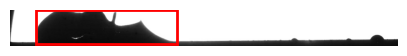

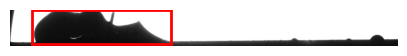

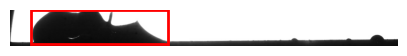

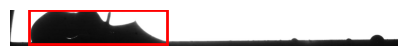

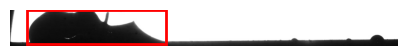

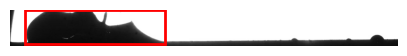

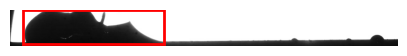

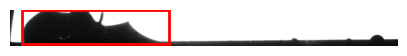

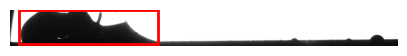

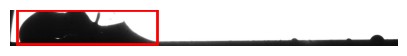

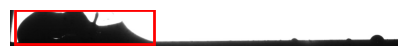

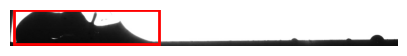

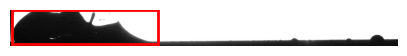

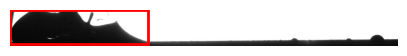

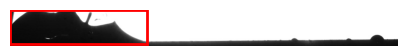

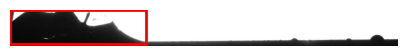

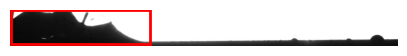

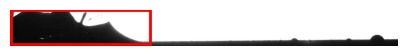

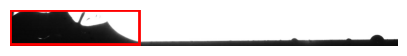

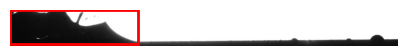

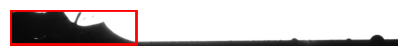

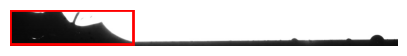

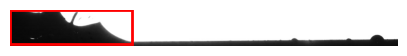

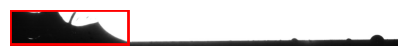

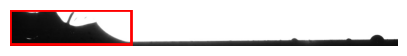

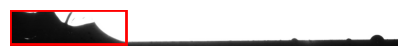

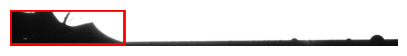

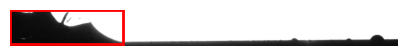

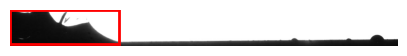

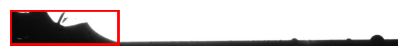

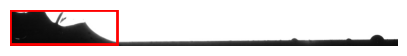

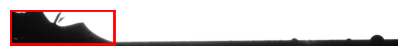

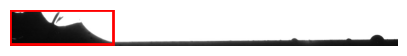

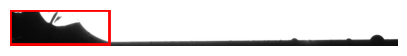

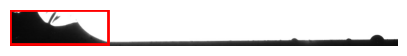

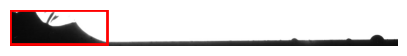

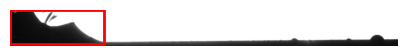

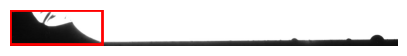

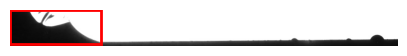

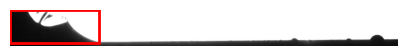

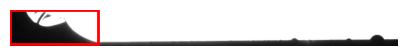

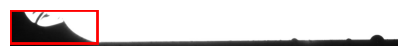

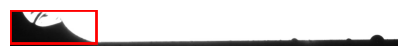

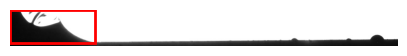

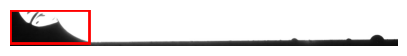

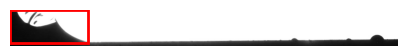

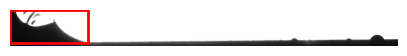

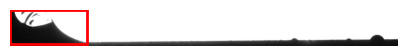

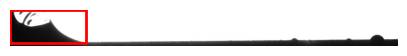

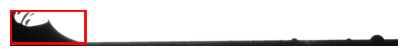

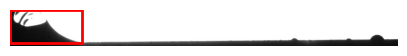

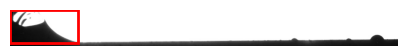

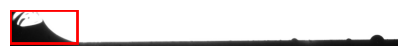

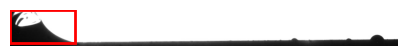

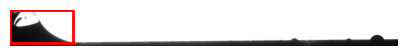

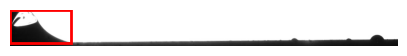

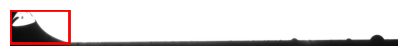

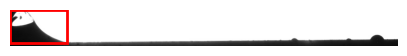

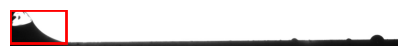

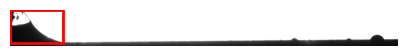

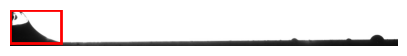

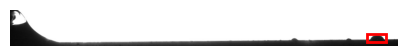

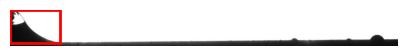

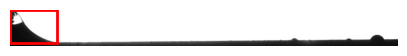

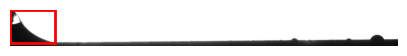

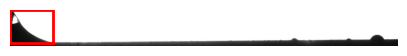

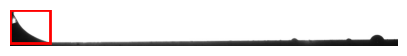

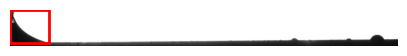

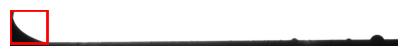

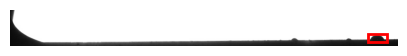

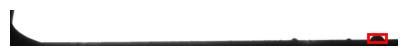

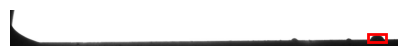

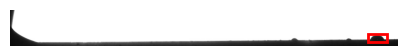

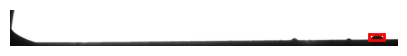

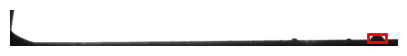

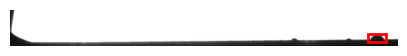

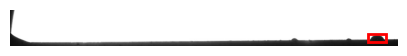

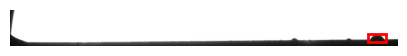

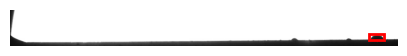

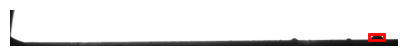

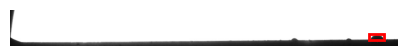

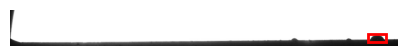

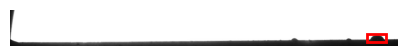

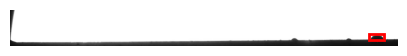

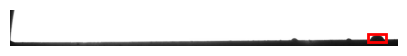

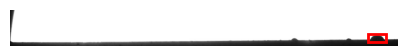

In [3]:
# Process images in batches of 10
batch_size = 10
for i in range(0, len(file_list), batch_size):
    batch_files = file_list[i:i+batch_size]
    batch_images = []

    for file in batch_files:
        image = cv2.imread(f"{base_rrot}/{file}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        batch_images.append(image)
    
    # Perform batch YOLO prediction
    results = yolo_m.predict(batch_images, verbose=False)

    for img, res in zip(batch_images, results):
        # Extract bounding box details (xywh format)
        if len(res.boxes.xywh) > 0:
            cc = np.array(res.boxes.xywh[:, :].cpu().numpy(), dtype=np.float32)[0]
            input_box = np.array([cc[0], cc[1], cc[2], cc[3]])
            
            # Get the coordinates of the bounding box
            x, y, w, h = input_box

            # Plot the image using Matplotlib
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.axis('off')

            # Draw the bounding box on the image
            rect = plt.Rectangle((x - w / 2, y - h / 2), w, h, linewidth=2, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rect)

            # Show the plot
            plt.show()

In [4]:
# # Process images in batches of 10
# batch_size = 10
# for i in file_list:

#     image = cv2.imread(f"test/t1/{i}")
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#     # Perform batch YOLO prediction
#     results = yolo_m.predict(image, verbose=False)

#         # Perform YOLO prediction
#     results = yolo_m.predict(image, verbose=False)

#     # Extract bounding box details (xywh format)
#     cc = np.array(results[0].boxes.xywh[:, :].cpu().numpy(), dtype=np.float32)[0]
#     input_box = np.array([cc[0], cc[1], cc[2], cc[3]])

#     # Get the coordinates of the bounding box
#     x, y, w, h = input_box

#     # Plot the image using Matplotlib
#     # plt.imshow(image)
#     # plt.axis('off')

#     # # Draw the bounding box on the image
#     # rect = plt.Rectangle((x - w / 2, y - h / 2), w, h, linewidth=2, edgecolor='r', facecolor='none')
#     # plt.gca().add_patch(rect)

#     # # Show the plot
#     # plt.show()

